In [27]:
from pathlib import Path
import xarray as xr

In [28]:
data_dir = Path('/mnt/d/data/raw')

In [29]:
sst = xr.open_dataset(Path(data_dir, 'HadISST_sst.nc'))

In [30]:
sst

<xarray.Dataset> Size: 484MB
Dimensions:    (time: 1868, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 15kB ...
    sst        (time, latitude, longitude) float32 484MB ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    6/10/2025 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [31]:
sst = sst['sst'].sel(time = slice('1979', '2025'), latitude = slice(50., 0.), longitude = slice(100., 180.))

In [32]:
sst

<xarray.DataArray 'sst' (time: 560, latitude: 50, longitude: 80)> Size: 9MB
[2240000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T12:00:00 ... 2025-08-16T1...
  * latitude   (latitude) float32 200B 49.5 48.5 47.5 46.5 ... 3.5 2.5 1.5 0.5
  * longitude  (longitude) float32 320B 100.5 101.5 102.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [33]:
climatology = sst.groupby("time.month").mean("time")
anomalies = sst.groupby("time.month") - climatology

In [34]:
t = anomalies.time
t

<xarray.DataArray 'time' (time: 560)> Size: 4kB
array(['1979-01-16T12:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-16T12:00:00.000000000', ..., '2025-06-16T00:00:00.000000000',
       '2025-07-16T12:00:00.000000000', '2025-08-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-16T12:00:00 ... 2025-08-16T12:...
    month    (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8
Attributes:
    long_name:      Time
    standard_name:  time

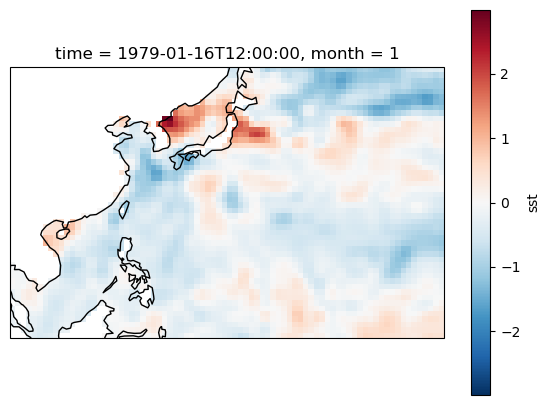

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example: anomalies is assumed to be an xarray DataArray with dims (time, lat, lon)

fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Initial plot
mesh = anomalies[0].plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True)

n = anomalies.shape[0]  # number of time steps

def update(t):
    mesh.set_array(anomalies[t].values.ravel())
    return mesh

frames = list(range(n)) + list(range(n-1, 0, -1))
ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)

ani.save(filename="result/pillow_example.gif", writer="pillow")


In [36]:
anomalies.to_netcdf('data/nwp_ssta_197901_202508.nc')